In [182]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

### Intenstine
m1 = m2 + m3

m2 = .1m1

m3 = .9m1

In [183]:
#INTESTINE 
Fe_molar = 55.8473 # g/mol
m1 = 18 # mg/day
m2 = 18 * .1 #mg/day
m3 = 18 * .9 #mg/day

#CHECK: 
print(m1 - m2 - m3)

0.0


In [184]:
#FE BINDING
utf_molar = 80_000 #g/mol
btf_molar = 2*Fe_molar + utf_molar 
m3 = 3.22*(10**-5) * Fe_molar
m4 = 2.69*(10**-5) * Fe_molar 
m5 = 2.65*(10**-6) * utf_molar
m6 = 2.65*(10**-6) * btf_molar

print(m3 + m5 - m4 - m6)

0.0


### Liver

$IN - OUT + GEN - CONS = 0$

$GEN = OUT - IN$

$\sigma R = OUT - IN$

$\dot m_{12} - \dot m_5 - \dot m_7 = 0$

In [185]:
m7 = 3.57*(10**-4)
m12 = 3.6*(10**-4)
print(m12 - m7 - m5)
gen_liver = m12 - m7 - m5

-0.21199699999999996


### bTf Box
$ IN - OUT = 0 $

$ \dot m_6 + \dot m_7 = \dot m_8 $

In [186]:
n8 = 7.2*(10**-4) # KNOWN
m8 = n8 * btf_molar
m6 = 2.65*(10**-6) * btf_molar

m7 = m8 - m6
print(f'n7 flow rate:  {m7/btf_molar:.6f}')
assert m6 + m7 - m8 == 0

n7 flow rate:  0.000717


### Bone Marrow
$ IN - OUT + GEN - CONS = 0 $

$ n_8 - n_9 + GEN = 0$

$ \sigma R = GEN = n_9 - n_8 $

In [187]:
# Bone Marrow
print(n8)
n9 = .5 * n8
print(n9)
print(n9 - n8)

0.00072
0.00036
-0.00036


### Heme box

$ 1.08 x 10^9 {heme ~molecules} = 1 {RBC molecules} $

$ n_9 * 6.022 * 10^{23} $

In [188]:
#HEME
heme_molar = 616.487 # g/mol
n10 = 200000000000 / (6.022*(10**23)) # 200 billion RBC, TURNING POINT OF MODEL
n9 = (4) * (270_000_000) * (n10)

gen_heme = n9 - n10
print(gen_heme) #rxn is insignificant
rbc_mass = 27*10**(-12) * 6.022 * 10**(23) #pic
print(f'n9: {n9}', f'n10: {n10}')
m10 = n10*rbc_mass
print(f'mass of 10 stream: {m10}')

0.0003586848219860512
n9: 0.00035868482231816675 n10: 3.3211557622052476e-13
mass of 10 stream: 5.4


### RBC 
$ IN - OUT + \sigma R = 0 $

$ GEN = m12 - m10 $


In [189]:
gen_degradation = m12 - m10
assert m12 < m10
print(gen_degradation)

# print(f'{m12 / Fe_molar}')

-5.399640000000001


### Enzymatic back-tracking for the synthesis of Heme

In [290]:
# Enzymatic back tracking:
# We use n9 to back track into enzyme concentration since we know the concentration of substrates and Km and Kcat
# v = [E0]*[Fe]*[PPIX]*kcat / (KmFe*[Fe] + KmPPIX*[PPIX] + [Fe]*[PPIX])
# therefore [E0] = v*(KmFe*[Fe] + KmPPIX*[PPIX] + [Fe]*[PPIX]) / ([Fe]*[PPIX]*kcat)
# v = n9 = 0.109uM/min
# [PPIX] = 15 uM
# [Fe] = 17 uM
# KmFe = 9.0 uM
# KmPPIX = 9.3 uM
kcat = 10.2 #1/min
E0 = (0.109*((9.0)*17 + 9.3*15 + 17*15)) / (17*15*10.2)
# units = uM
print(E0)
vmax = E0 * kcat 
print(vmax)

0.02294405997693195
0.23402941176470587


### Diseased-State Synthesis of Heme

In [191]:
# Assume [E0], [PPIX], kcat, and KM values do not change
# [Fe] changes to 60 uG/dL
Fe_Dis = 60 * 10 * (1/55.845)
# ^ conversion from uG/dL to uM
# v = [E0]*[Fe]*[PPIX]*kcat / (KmFe*[Fe] + KmPPIX*[PPIX] + [Fe]*[PPIX])
v_dis = (0.02294405997693195) * Fe_Dis * 15 * 10.2 / (9.0*Fe_Dis + 9.3*15 + Fe_Dis*15)
# ^ units = uM/min
print(Fe_Dis, v_dis)
# plasma volume in a woman = 2.3L
n9_dis = v_dis * 2.3 * 60 * 24 * 10**-6
# ^ units = mols/day
print(n9_dis)

10.744023636852 0.09491793034536491
0.0003143681853038486


### Fed Batch Synthesis System

## SS
## in - cons = 0

In [263]:
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt

tspan = np.arange(0, 7, 0.1) #min
# time span for integration
PPIX_molar = 562.6581 #g/mol

Vmax = (0.23 *(10**-6))*1440 #M/min

Fe0 = (20 *(10**-6)) * 2.25 #Molar x L = mol, initial moles of Fe
PPIX0 = 100*(10**-6) * 2.25 #Molar x L = mol, initial moles of PPIX 
kmP = 11 *(10**-6)#M
kmFe = 80 *(10**-6)#M
CO = 5*1440 #L/min
#assume density of bone marrow ~ of blood (1g/cm^3)
dens = 1 #g/mL

#Molar flow rates in of both substrates 
iron_inlet = (n8* 2)/(1440) #M/min
    #multiplied by 2 because 2 Fe per 1 btf 
ppix_inlet = (3.14*(10**-4)/(1440) #M/min
    #come back and find what ppix should be 

X0 = np.array([Fe0, PPIX0, 0])  # Initial moles of A and B in vessel

def FlowReact(X, t): 
    Fe = X[0]  # Moles of Fe
    PPIX = X[1]  # Moles of PPIX
    
    vol = (((X[0]*Fe_molar) + (X[1]*PPIX_molar)) / dens) * 1000 #Liters
    Fe_conc = X[0]/vol
    PPIX_conc = X[1]/vol 
    
    cons = (-(Vmax * Fe_conc * PPIX_conc) / ((kmP * Fe_conc) + (kmFe * PPIX_conc) + (Fe * PPIX_conc)))
    
    dFe = (iron_inlet + cons)  # Change in Fe is flow in - consumption
    dPPIX = (ppix_inlet + cons)     # Change in PPIX is flow in - consumption
    dHeme = -cons  # Change in Heme is generation 
    
    return np.array([dFe, dPPIX, dHeme])

solution = odeint(FlowReact, X0, tspan)  # Solve ode

fig, ax1 = plt.subplots()      # Create plot for use with two y-axes
ax1.plot(tspan, solution[:,0], label='Fe')      # Plot of Fe vs. time on axis 1 (left)
ax1.plot(tspan, solution[:,1], label='PPIX')      # Plot of PPIX vs. time on axis 1 (left)
ax1.plot(tspan, solution[:,2], label='Heme')      # Plot of Heme vs. time on axis 1 (left)

ax2 = ax1.twinx()  
ax2.plot(tspan, vol, "g--", label="Volume")  # Add plot of volume vs time with green dashed line and label
ax2.set_ylabel("Volume")       # Set y-axis title (right)
ax2.set_ylim(bottom=10)        # Set y-axis (right) lower value to 10

plt.title("Flow Reactions")    # Set plot title
plt.xlabel("Time (min)")        # Set x-axis title
plt.ylabel("Moles")            # Set y-axis title (left)
plt.xlim(left=0)               # Set lower x-axis value to 0

plt.legend(loc="upper left")  # Set legend for left axis
handles, labels = ax1.get_legend_handles_labels()  # Get handles and labels for lines plotted on left y-axis
ax1.legend(handles, labels, loc="upper right")      # Set legend for left axis


SyntaxError: invalid syntax (1102413441.py, line 25)

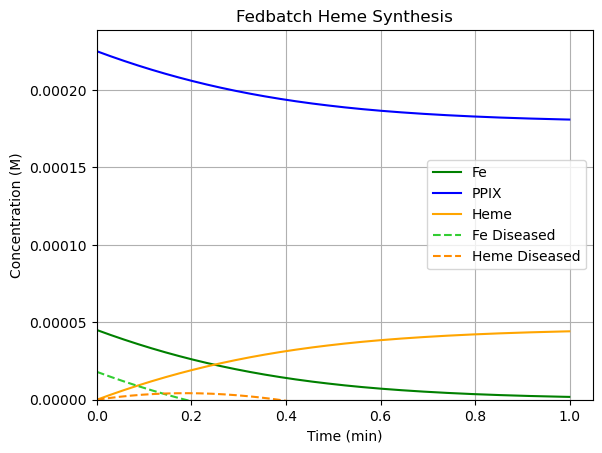

In [286]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Constants
Vmax = 0.23 * (10**-6) * 1440 # M/min
kmP = 11 * (10**-6) # M
kmFe = 80 * (10**-6) # M

# Initial conditions
Fe0 = 20 * (10**-6) * 2.25 # Molar x L = mol, initial moles of Fe
Fe0_dis = 8 * (10**-6) * 2.25
PPIX0 = 100 * (10**-6) * 2.25 # Molar x L = mol, initial moles of PPIX
Heme0 = 0 # Molar x L = mol, initial moles of heme
inletFe = (n8*2)/1440 # M/min, iron inlet
inletFe_dis = (3.14*(10**-4))/1440 #M/min
inletPPIX = ((10**-4))/1440 # M/min, PPIX inlet

tspan = np.arange(0, 1, 0.001) # time span for integration

def fedbatch(y, t):
    Fe, PPIX, Heme, Fe_dis, Heme_dis = y
    
    # Iron inlet
    dFedt = inletFe
    dFedt_dis = inletFe_dis
    
    # PPIX inlet
    dPPIXdt = inletPPIX
    
    # Heme synthesis
    V = Vmax * Fe / (kmFe + Fe) * PPIX / (kmP + PPIX)
    dHemedt = V
 

    # Mass balances
    dFedt = dFedt - V
    dPPIXdt = dPPIXdt - V
    #Diseased
    dFedt_dis = dFedt_dis - V
    dHemedt_dis = V * (Fe_dis / Fe)
    
    return np.array([dFedt, dPPIXdt, dHemedt, dFedt_dis, dHemedt_dis])

solution = odeint(fedbatch, [Fe0, PPIX0, Heme0, Fe0_dis, Heme0], tspan) # solve ODE

# Create plot of concentration vs. time
plt.plot(tspan, solution[:,0], color='g', linestyle='-', label='Fe')
plt.plot(tspan, solution[:,1], color='b', linestyle='-', label='PPIX')
plt.plot(tspan, solution[:,2], color='orange', linestyle='-', label='Heme')
plt.plot(tspan, solution[:,3], color='limegreen', linestyle='--', label='Fe Diseased')
plt.plot(tspan, solution[:,4], color='darkorange', linestyle='--', label='Heme Diseased')

plt.title("Fedbatch Heme Synthesis")
plt.xlabel("Time (min)")
plt.ylabel("Concentration (M)")
plt.legend()
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.grid()
plt.show()

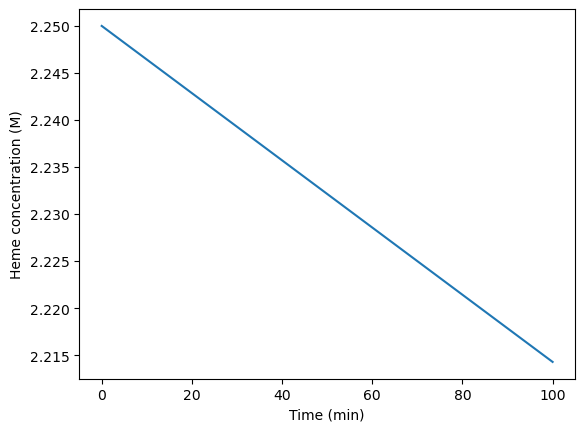

In [257]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define system parameters
V0 = 2.25 # initial volume of reactor (L)
Fe0 = 17e-6 # initial concentration of Fe (M)
PPIX0 = 100.0e-6 # initial concentration of PPIX (M)
Vmax = 0.23e-6 # maximum reaction rate (M/min)
kmFe = 80.0e-6 # Michaelis constant for Fe (M)
kmP = 11.0e-6 # Michaelis constant for PPIX (M)
Fe_in = (n8* 2)/(1440) #mol/min 
PPIX_in = n8/1440 #mol/min
Qin = Fe_in + PPIX_in # volumetric flow rate of inlet stream (L/min)
Qout = n9 # volumetric flow rate of outlet stream (L/min)

# Define differential equations
def heme_sys(t, y):
    V, Fe, PPIX = y
    dVdt = Qin - Qout # flow rate balance
    dFedt = Qin * (Fe0 - Fe) / V - Vmax * Fe / (kmFe + Fe) * PPIX # mass balance for Fe
    dPPIXdt = Qin * (PPIX0 - PPIX) / V - Vmax * PPIX / (kmP + PPIX) * Fe # mass balance for PPIX
    return [dVdt, dFedt, dPPIXdt]

# Define initial conditions
y0 = [V0, Fe0, PPIX0]

# Define time span for simulation
tspan = [0, 100]

# Solve differential equations
sol = solve_ivp(heme_sys, tspan, y0, method='BDF')

# Plot results
plt.plot(sol.t, sol.y[0])
plt.xlabel('Time (min)')
plt.ylabel('Heme concentration (M)')
plt.show()


## gen - out = 0

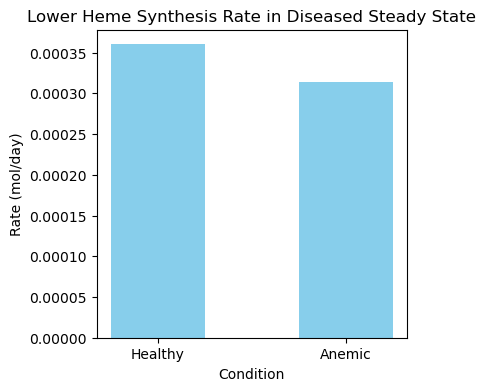

In [287]:
import matplotlib.pyplot as plt

# Define the data
healthy_rate = 3.6e-4
diseased_rate = 3.14e-4

# Create a bar chart
plt.figure(figsize=(4, 4))
plt.bar([0, 0.2], [healthy_rate, diseased_rate], width=0.1, align='center', color="skyblue")
plt.xticks([0, 0.2], ['Healthy', 'Anemic'])

# Add labels and title
plt.xlabel('Condition')
plt.ylabel('Rate (mol/day)')
plt.title('Lower Heme Synthesis Rate in Diseased Steady State')

# Display the chart
plt.show()


10.0
10.00000011096857
10.00000011096857
10.00000022193714
10.00000022193714
10.000249153595359
10.000249153595359
10.000498085253579
10.000498085253579
10.0007470169118
10.000747016911799
10.002784896807006
10.002784896807006
10.00201045288422
10.00201045288422
10.000999704106285
10.000999704106283
10.001252391300769
10.001252391300769
10.001505078495253
10.001505078495255
10.001757765689739
10.001757765689739
10.002263140078705
10.002263140078705
10.002768514467672
10.002768514467672
10.00327388885664
10.00327388885664
10.003779263245608
10.003779263245606
10.004284637634573
10.004284637634573
10.009338381524252
10.009338381524252
10.014392125413929
10.014392125413929
10.019445869303604
10.019445869303604
10.02449961319328
10.02449961319328
10.029553357082955
10.029553357082957
10.050737441145984
10.050737441145985
10.071921525208996
10.071921525209016
10.09310560927203
10.093105609272046
10.114289693335076
10.114289693335078
10.135473777398106
10.135473777398108
10.156657861461136
1

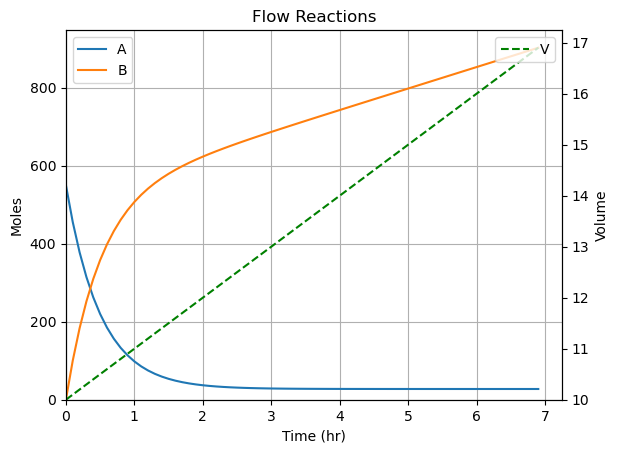

In [225]:
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt

tspan = np.arange(0.0, 7.0, 0.1)  # time span for integration
dens = 55.0  # Molar density of fluid in mol/liter
k1 = 2.0  # Reaction rate constant in 1/hr, assuming first order reaction
n = 55.0  # Molar flow rate, in mol/hr, of reactant A into vessel
X0 = np.array([550.0, 0.0])  # Initial moles of A and B in vessel

def FlowReact(X, t):
    # Moles of A is X[0], Moles of B is X[1]
    vol = (X[0] + X[1]) / dens    # Converts moles to liters
    print(vol)
    A_conc = X[0] / vol
    dX_0 = n - k1 * vol * A_conc  # Change in A is flow in - consumption
    dX_1 = k1 * vol * A_conc      # Change in B is generation
    return np.array([dX_0, dX_1])
    
solution = integrate.odeint(FlowReact, X0, tspan)  # Solve ode
vol = (solution[:, 0] + solution[:, 1]) / dens     # Calc volume at each step

fig, ax1 = plt.subplots()      # Create plot for use with two y-axes
ax1.plot(tspan, solution)      # Plot of moles vs. time on axis 1 (left)
plt.title("Flow Reactions")    # Set plot title
plt.xlabel("Time (hr)")        # Set x-axis title
plt.ylabel("Moles")            # Set y-axis title (left)
plt.legend(["A", "B"])         # Set legend for left axis
plt.xlim(left=0)               # Set lower x-axis value to 0
plt.ylim(bottom=0)             # Set lower y-axis (left) value to 0
ax1.grid()                     # Toggle on grid-lines for axis 1
ax2 = ax1.twinx()              # Create 2nd y-axis using the same x-axis
ax2.plot(tspan, vol, "g--")    # Add plot of volume vs time with green dashed line
ax2.set_ylabel("Volume")       # Set y-axis title (right)
ax2.set_ylim(bottom=10)        # Set y-axis (right) lower value to 10
ax2.legend("Volume", loc="upper right")  # Set Legend for 2nd axis
plt.show()                     

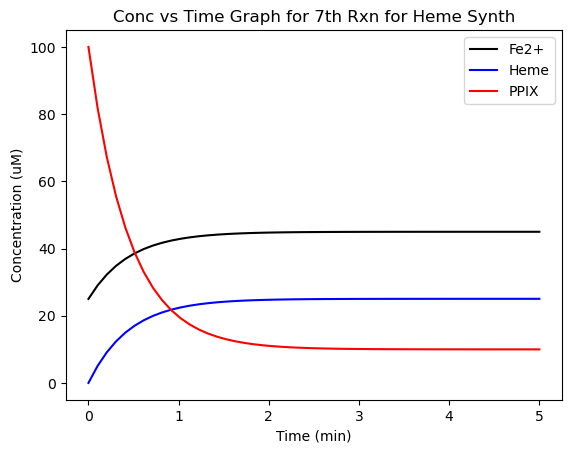

In [291]:
#michaelis menten
Vmax = 0.23 #uM/min
kmP = 17 #uM
kmFe = 15 #uM
Fe0 = 25 #uM 
PPIX0 = 100 #uM
# ALA = 140
Heme0 = 0 # uM
n8 = 7.2*(10**2) * (1/1440) * 2 # KNOWN uM/min # 
t = np.linspace(0,5)
Fe_conc = np.linspace (12.7, 35.9) #uM
#Fe_in = n8
#PPIX_in = 0.2
v=2.25 #L
flow =  5 #L/min cardiac output
PPIX_flow = 10*flow
Fe_flow = 45*flow # umol/min
Heme_flow = 25*flow


#A0 = np.array([Fe0, PPIX0, 0])
Heme_arr = []

def MMsolver(A,t):
    Fe, PPI, Heme = A
    dFe = (Fe_flow + (-(Vmax*Fe*PPI) / ((kmFe*Fe) + (kmP*PPIX0) + (Fe * PPI)))*v - Fe*flow)/v
    dPPI = (PPIX_flow + (-(Vmax*Fe*PPI) / ((kmFe*Fe) + (kmP*PPIX0) + (Fe * PPI)))*v - PPI*flow)/v
    dHeme = (Heme_flow + ((Vmax*Fe*PPI) / ((kmP*Fe) + (kmFe*PPI) + (Fe * PPI)))*v-Heme*flow)/v
    return [dFe, dPPI, dHeme]

for i in Fe_conc: 
    temp = odeint(MMsolver, [Fe0, PPIX0, Heme0], t)
    Fe_temp, PPI_temp, heme_temp = temp[:,0], temp[:,1], temp[:,2]
    dHeme_dt = (heme_temp[-1] - heme_temp[0]) / (t[-1] - t[0])
    Heme_arr.append(heme_temp[-1])


plt.plot(t, Fe_temp, "k-", label="Fe2+")
plt.plot(t, heme_temp, "b-", label="Heme")
plt.plot(t, PPI_temp, "r-", label="PPIX")

# plt.plot(Fe_conc, Heme_arr, "bo-")
# plt.xlabel("Fe2+ Concentration (uM)")
# plt.ylabel("Heme Concentration (uM)")
# plt.title("Heme vs Fe2+ Concentration")
# plt.show()

# plt.plot(t, Fe_temp - Fe0, "k-", label="Fe2+")
# plt.plot(t, PPI_temp - PPIX0, "r-", label="PPIX")
# plt.xlabel("Time (s)")
# plt.ylabel("Change in Concentration (uM)")
# plt.title("Change in Fe2+ and PPIX Concentration over Time")
# plt.legend()
# plt.show()


plt.xlabel("Time (min)")
plt.ylabel("Concentration (uM)")
plt.title("Conc vs Time Graph for 7th Rxn for Heme Synth")
plt.legend()

### Hematocrit 
$ HCT = (RBC x MCV)/10 $

In [312]:
healthy_MCV = 90 #Liters
dis_MCV = 70 #Liters #Value is assumed, anemic is classified as <80 fl 

#Flow rate representing RBC synthesis = n10
n10_dis = 2.91*(10**-13) #mol/day

#4.3 = total blood volume for female 

#Fractional difference between healthy vs diseased RBC production 
rbc = (n10_dis*6.022*10**23)/4.3 #cell/day-L -- Diseased
rbcH = (3.32*(10**-13)*6.022*10**23)/4.3 #cell/day-L -- Healthy
print(rbc)
print(rbcH)
fract_diff = rbc/rbcH

#Avg for women 
healthy_RBC = 4.5 #cells/L 
dis_RBC = healthy_RBC*fract_diff #cells/L

healthy_HCT = (healthy_MCV*healthy_RBC)/10
dis_HCT = (dis_MCV * dis_RBC)/10
print(f'healthy Hct: {healthy_HCT}')
print(f'diseased Hct: {dis_HCT}')

percent_diff = ((healthy_HCT - dis_HCT)/healthy_HCT)*100
print(percent_diff)
#these r not physiologically accurate 

40753534883.72093
46495441860.46512
healthy Hct: 40.5
diseased Hct: 27.609939759036145
31.827309236947794


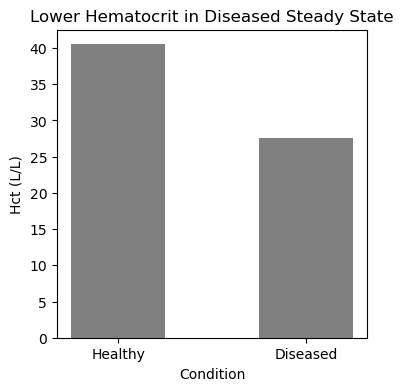

In [313]:
# Create a bar chart
plt.figure(figsize=(4, 4))
plt.bar([0, 0.2], [healthy_HCT, dis_HCT], width=0.1, align='center', color="gray")
plt.xticks([0, 0.2], ['Healthy', 'Diseased'])

# Add labels and title
plt.xlabel('Condition')
plt.ylabel('Hct (L/L)')
plt.title('Lower Hematocrit in Diseased Steady State')

# Display the chart
plt.show()

$ E + G 

In [ ]:
#instantaneous blood cell count after PPH 
PPH_RBC0 = 1.6e-13 #cells 



### 